<a href="https://colab.research.google.com/github/virajbhutada/PRODIGY_ML_01/blob/main/Task1_LinearRegression_HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To implement a linear regression model for predicting house prices. The dataset included essential features such as square footage, number of bedrooms, and number of bathrooms. The task required loading the data, selecting relevant features, splitting the dataset into training and testing sets, and training the linear regression model. Key components included data preprocessing, model training, evaluation using metrics like R-squared, MAE, and RMSE, and visualizing the results. This task laid the foundation for understanding the factors influencing house prices and honed skills in regression modeling and data analysis.

Dataset: https://www.kaggle.com/datasets/shivachandel/kc-house-data/code







# Import Libraries:

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Load and Explore Data:

In [52]:
# Load your dataset
df = pd.read_csv('kc_house_data.csv')




In [53]:
# Explore the dataset (optional)
print(df.head())


           id             date   price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221,900         3          1         1180   
1  6414100192  20141209T000000 538,000         3          2         2570   
2  5631500400  20150225T000000 180,000         2          1          770   
3  2487200875  20141209T000000 604,000         4          3         1960   
4  1954400510  20150218T000000 510,000         3          2         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650       1           0     0  ...      7        1180              0   
1      7242       2           0     0  ...      7        2170            400   
2     10000       1           0     0  ...      6         770              0   
3      5000       1           0     0  ...      7        1050            910   
4      8080       1           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode  lat  long  sqft_living15  

In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Feature Selection and Data Preparation
The relevant features (square footage, number of bedrooms, and number of bathrooms) and the target variable (price) are selected. The data is split into training and testing sets for model training and evaluation.

In [56]:
# Selecting features (X) and target variable (y)
features = ['sqft_living', 'bedrooms', 'bathrooms']
target = 'price'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Initialization, Training, and Evaluation:

The linear regression model is initialized, trained using the training data, and evaluated using test data. Mean Squared Error (MSE) is calculated to assess the model's performance.

In [57]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)


Mean Squared Error: 74237634953.1832


# Making Predictions:

In [58]:
# Example: Making predictions on new data
new_data = pd.DataFrame({'sqft_living': [1500], 'bedrooms': [3], 'bathrooms': [2]})
predicted_price = model.predict(new_data)
print('Predicted Price:', predicted_price[0])


Predicted Price: 381826.6681755521


# Data Visualization





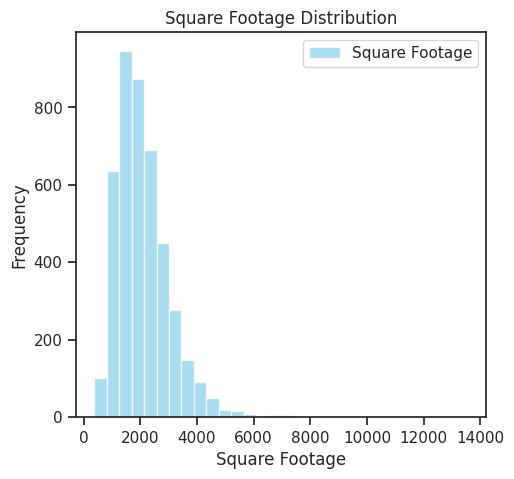

In [62]:
import matplotlib.pyplot as plt

# Example: Visualizing predictions vs. actual values based on the selected features
plt.figure(figsize=(18, 5))

# Visualize histograms for square footage
plt.subplot(1, 3, 1)
plt.hist(X_test['sqft_living'], bins=30, color='skyblue', alpha=0.7, label='Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.title('Square Footage Distribution')
plt.legend()

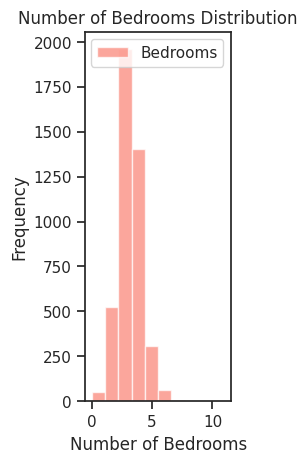

In [63]:
# Visualize histograms for number of bedrooms
plt.subplot(1, 3, 2)
plt.hist(X_test['bedrooms'], bins=10, color='salmon', alpha=0.7, label='Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Number of Bedrooms Distribution')
plt.legend()

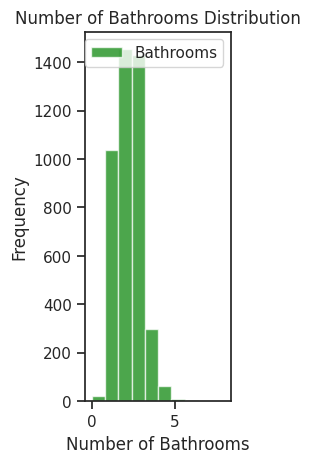

In [64]:
# Visualize histograms for number of bathrooms
plt.subplot(1, 3, 3)
plt.hist(X_test['bathrooms'], bins=10, color='green', alpha=0.7, label='Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.title('Number of Bathrooms Distribution')
plt.legend()

[(0.0, 250000.0)]

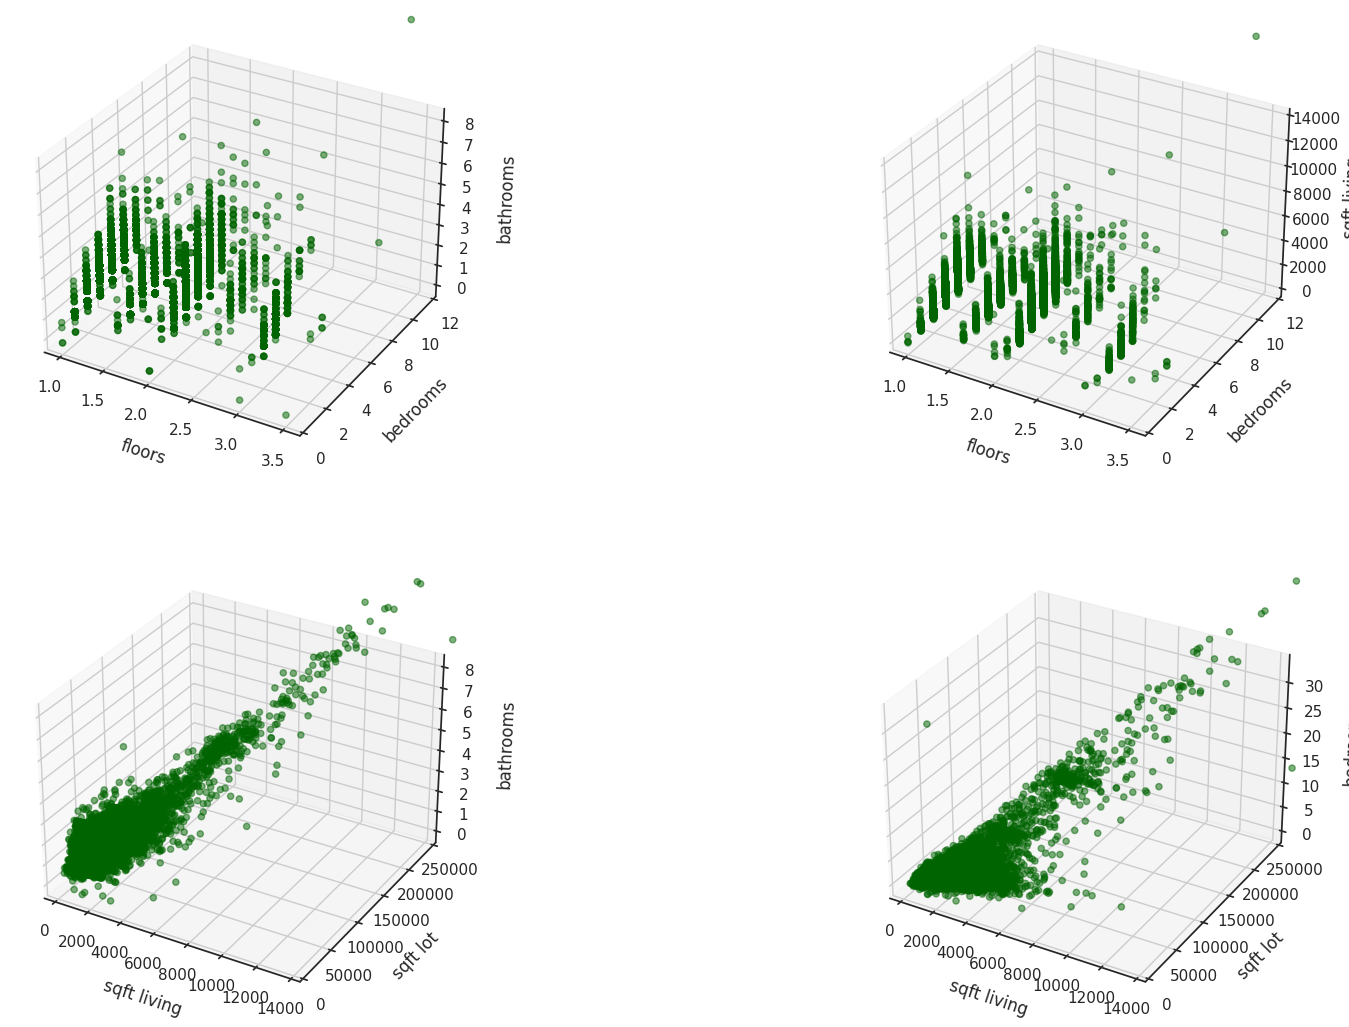

In [68]:
#3d plot
fig=plt.figure(figsize=(20,13))
ax=fig.add_subplot(2,2,1,projection='3d')
ax.scatter(df['floors'],df['bedrooms'],df['bathrooms'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nfloors',ylabel='\nbedrooms',zlabel='\nbathrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2,projection='3d')
ax.scatter(df['floors'],df['bedrooms'],df['sqft_living'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nfloors',ylabel='\nbedrooms',zlabel='\nsqft living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3,projection='3d')
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bathrooms'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft living',ylabel='\nsqft lot',zlabel='\nbathrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4,projection='3d')
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bedrooms'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft living',ylabel='\nsqft lot',zlabel='\nbedrooms')
ax.set(ylim=[0,250000])

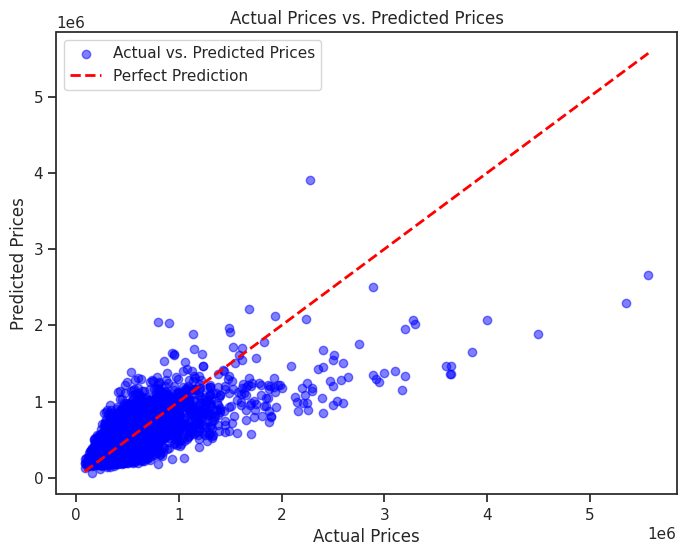

In [65]:
# Scatter plot for predictions vs. actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5, label='Actual vs. Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.legend()
plt.show()

The histograms illustrate the distributions of square footage, number of bedrooms, and bathrooms. These visualizations reveal insights into the range and frequency of each feature. Additionally, the scatter plot comparing actual vs. predicted prices provides an overview of the model's accuracy. The blue dots represent actual prices, and the model's predictions are denoted by red dots. The closer these dots are to the red dashed line (representing a perfect prediction), the more accurate the model is. Visual examination aids in understanding the relationships between features and house prices and identifies areas for potential model improvement.



# Model Coefficients and Intercept:

This block calculates and prints the coefficients and intercept of the linear regression model. Coefficients indicate the impact of features (square footage, bedrooms, bathrooms) on house prices, while the intercept represents the base price. These values offer insights into the model's inner workings.

In [66]:
# Print coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print('Coefficients:', coefficients)
print('Intercept:', intercept)


Coefficients: [   305.64613097 -56373.55481765  11296.92029198]
Intercept: 69884.2955837939


# Evaluation Metrics Calculation:

R-squared (R²) score, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) are calculated to evaluate the model's predictive accuracy.



In [67]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# R-squared score
r2 = r2_score(y_test, predictions)
print('R-squared:', r2)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)


R-squared: 0.5089347172264876
Mean Absolute Error: 174662.93438524107
Root Mean Squared Error: 272465.84180991055




- R-squared (R²) Score: 0.509
- Mean Absolute Error (MAE): \$174,662.93
- Root Mean Squared Error (RMSE): \$272,465.84

The linear regression model demonstrated a moderate performance, explaining 50.9% of the variance in house prices. The MAE of approximately \$174,662.93 signifies the average prediction error, and the RMSE of approximately \$272,465.84 indicates the typical magnitude of errors. While the model is reasonably predictive, there is potential for accuracy enhancement through further refinements.

----
### **Conclusion:**

- Developed a linear regression model to predict house prices based on square footage, bedrooms, and bathrooms.
- Achieved a moderate performance with an R-squared score of \(0.509\), explaining \(50.9\%\) of price variance.
- Evaluated model accuracy using Mean Absolute Error (MAE) of \$174,662.93 and Root Mean Squared Error (RMSE) of \$272,465.84.
- Identified potential for improvement, paving the way for future enhancements and feature explorations.
- This analysis provides valuable insights for understanding and predicting housing market dynamics.